## Explore metadata for a curated dataset

This notebook shows how to explore the metadata of your JSTOR and/or Portico dataset using Python. The following processes are described:

* Importing your dataset
* Discovering the size and contents of your dataset
* Turning your dataset into a pandas dataframe
* Visualizing the contents of your dataset as a graph with pandas

A familiarity with pandas is helpful but not required.
____
We import the [pandas](./key-terms.ipynb#pandas) module to help visualize and manipulate our data. Importing `as pd` allows us to call pandas' functions using the short phrase `pd` instead of typing out `pandas` each time. 

In [1]:
import pandas as pd

We import the `Dataset` module from the `tdm_client` library. The tdm_client library contains functions for connecting to the JSTOR server containing our [corpus](./key-terms.ipynb#corpus) [dataset](./key-terms.ipynb#dataset). To analyze your dataset, use the [dataset ID](./key-terms.ipynb/#dataset-ID) provided when you created your [dataset](./key-terms.ipynb/#dataset). A copy of your [dataset ID](./key-terms.ipynb/#dataset-ID) was sent to your email when you created your [corpus](./key-terms.ipynb#corpus). It should look like a long series of characters surrounded by dashes. 

In [2]:
from tdm_client import Dataset

We create a new variable **dset** and initialize its value using the **Dataset** function. A sample **dataset ID** featuring Shakespeare Quarterly (1950-2014) is provided here ('59c090b6-3851-3c65-e016-9181833b4a2c'). Pasting your unique **dataset ID** here will import your dataset from the JSTOR server.

**Note**: If you are curious what is in your dataset, there is a download link in the email you received. The format and content of the files is described in the notebook [Building a Dataset](./1-building-a-dataset.ipynb). 

In [3]:
dset = Dataset('59c090b6-3851-3c65-e016-9181833b4a2c')

Find total number of documents in the dataset using the `len()` function. 

In [4]:
len(dset)

6687

The dset variable now contains all the documents in our corpus. We can take a peak at our documents using in our dataset by taking a slice of the first five items.

In [5]:
dset.items[0:5]

['http://www.jstor.org/stable/24778431',
 'http://www.jstor.org/stable/24778442',
 'http://www.jstor.org/stable/24778441',
 'http://www.jstor.org/stable/44990760',
 'http://www.jstor.org/stable/44990258']

We can also check if a particular item is in our list if we know the stable url using the `in` or `not in` operators. Let's check to see if volume 5.1 of the journal *Mosaic* is `in` the dataset by using its stable URL (https://www.jstor.org/stable/i24775424).

In [10]:
'http://www.jstor.org/stable/44990760' in dset.items

True

The document metadata can be retrieved by calling the `get_metadata` method. The metadata is a list of Python dictionaries containing attributes for each document. We create a new list variable `metadata` by using the `get_metadata` method on dset. 

In [11]:
metadata = dset.get_metadata()

https://www.jstor.org/api/tdm/v1/nb/dataset/59c090b6-3851-3c65-e016-9181833b4a2c/metadata/


Print the contents of **metadata** for the first document in the dataset. The data is displayed as a dictionary of key/value pairs. 

In [12]:
print(metadata[0])

{'creators': ['Ian Smith'], 'datePublished': '2013-04-01T00:00:00Z', 'docType': 'article', 'id': 'http://www.jstor.org/stable/24778431', 'identifier': [{'name': 'issn', 'value': '00373222'}, {'name': 'oclc', 'value': '39852252'}, {'name': 'local_doi', 'value': '10.2307/24778431'}], 'isPartOf': 'Shakespeare Quarterly', 'language': ['eng'], 'outputFormat': ['unigram'], 'pageCount': 25, 'pageEnd': '25', 'pageStart': '1', 'pagination': 'pp. 1-25', 'provider': 'jstor', 'publicationYear': 2013, 'publisher': 'Folger Shakespeare Library', 'sourceCategory': ['Language & Literature', 'Humanities', 'Performing Arts', 'Arts'], 'tdmCategory': ['Literature on music', 'Visual arts', 'Literature (General)'], 'title': "Othello's Black Handkerchief", 'url': 'http://www.jstor.org/stable/24778431', 'volumeNumber': '1', 'wordCount': 11500, 'yearPublished': 2013}


We can convert `metadata` to a Pandas dataframe to take advantage of its plotting and manipulation functions. This will help us learn more about what's in our metadata. We define this new dataframe as `df`.

In [13]:
df = pd.DataFrame(metadata)

Print the first 5 rows of the dataframe `df` with the `head` attribute.

In [14]:
df.head()

,abstract,creators,datePublished,docType,id,identifier,isPartOf,language,outputFormat,pageCount,...,provider,publicationYear,publisher,sourceCategory,tdmCategory,title,url,volumeNumber,wordCount,yearPublished
0,NaN,[Ian Smith],2013-04-01T00:00:00Z,article,http://www.jstor.org/stable/24778431,"[{'name': 'issn', 'value': '00373222'}, {'name...",Shakespeare Quarterly,[eng],[unigram],25,...,jstor,2013,Folger Shakespeare Library,"[Language & Literature, Humanities, Performing...","[Literature on music, Visual arts, Literature ...",Othello's Black Handkerchief,http://www.jstor.org/stable/24778431,1,11500,2013
1,NaN,[Nick Moschovakis],2013-04-01T00:00:00Z,article,http://www.jstor.org/stable/24778442,"[{'name': 'issn', 'value': '00373222'}, {'name...",Shakespeare Quarterly,[eng],[unigram],5,...,jstor,2013,Folger Shakespeare Library,"[Language & Literature, Humanities, Performing...","[English literature, Christianity, Christian D...",Review Article,http://www.jstor.org/stable/24778442,1,2265,2013
2,NaN,[Balz Engler],2013-04-01T00:00:00Z,article,http://www.jstor.org/stable/24778441,"[{'name': 'issn', 'value': '00373222'}, {'name...",Shakespeare Quarterly,[eng],[unigram],2,...,jstor,2013,Folger Shakespeare Library,"[Language & Literature, Humanities, Performing...","[English literature, Modern languages; Celtic ...",Review Article,http://www.jstor.org/stable/24778441,1,713,2013
3,NaN,NaN,1994-01-01T00:00:00Z,article,http://www.jstor.org/stable/44990760,"[{'name': 'issn', 'value': '00373222'}, {'name...",Shakespeare Quarterly,[eng],[unigram],3,...,jstor,1994,Oxford University Press,"[Language & Literature, Humanities, Performing...","[Modern languages; Celtic languages, English l...",Front Matter,http://www.jstor.org/stable/44990760,5,737,1994
4,NaN,NaN,1993-01-01T00:00:00Z,article,http://www.jstor.org/stable/44990258,"[{'name': 'issn', 'value': '00373222'}, {'name...",Shakespeare Quarterly,[eng],[unigram],6,...,jstor,1993,Oxford University Press,"[Language & Literature, Humanities, Performing...","[Modern languages; Celtic languages, Local His...",Front Matter,http://www.jstor.org/stable/44990258,5,1348,1993


We can find the year range in our pandas dataframe by finding the minimum and maximum of `datePublished`.

In [15]:
minYear = df['datePublished'].min()
maxYear = df['datePublished'].max()

print(str(minYear) + ' to ' + str(maxYear))

1950 to 2013


Now let's do some preliminary analysis. Let's say we want to plot the number of documents by decade in the sample set. 

Since `decade` isn't a value in our dataset, we need to add it to the dataframe. We can do this by defining a new dataframe column `decade`. To translate a year (1925) to a decade (1920), we need to subtract the final digit so it becomes a zero. We can find the value for the final digit in any particular case by using modulo (which provides the remainder of a division). Here's an example using the date 1925.

In [16]:
1925 - (1925 % 10)

1920

We can translate this example to the whole dataframe using the following code.

In [17]:
def add_decade(value):
    yr = int(value[:4])
    decade = yr - ( yr % 10 )
    return decade

df['decade'] = df['datePublished'].apply(add_decade)

To see the new decade column in our data, let's print the first 5 rows of the dataframe again.

In [18]:
df.head()

,abstract,creators,datePublished,docType,id,identifier,isPartOf,language,outputFormat,pageCount,...,publicationYear,publisher,sourceCategory,tdmCategory,title,url,volumeNumber,wordCount,yearPublished,decade
0,NaN,[Ian Smith],2013-04-01T00:00:00Z,article,http://www.jstor.org/stable/24778431,"[{'name': 'issn', 'value': '00373222'}, {'name...",Shakespeare Quarterly,[eng],[unigram],25,...,2013,Folger Shakespeare Library,"[Language & Literature, Humanities, Performing...","[Literature on music, Visual arts, Literature ...",Othello's Black Handkerchief,http://www.jstor.org/stable/24778431,1,11500,2013,2010
1,NaN,[Nick Moschovakis],2013-04-01T00:00:00Z,article,http://www.jstor.org/stable/24778442,"[{'name': 'issn', 'value': '00373222'}, {'name...",Shakespeare Quarterly,[eng],[unigram],5,...,2013,Folger Shakespeare Library,"[Language & Literature, Humanities, Performing...","[English literature, Christianity, Christian D...",Review Article,http://www.jstor.org/stable/24778442,1,2265,2013,2010
2,NaN,[Balz Engler],2013-04-01T00:00:00Z,article,http://www.jstor.org/stable/24778441,"[{'name': 'issn', 'value': '00373222'}, {'name...",Shakespeare Quarterly,[eng],[unigram],2,...,2013,Folger Shakespeare Library,"[Language & Literature, Humanities, Performing...","[English literature, Modern languages; Celtic ...",Review Article,http://www.jstor.org/stable/24778441,1,713,2013,2010
3,NaN,NaN,1994-01-01T00:00:00Z,article,http://www.jstor.org/stable/44990760,"[{'name': 'issn', 'value': '00373222'}, {'name...",Shakespeare Quarterly,[eng],[unigram],3,...,1994,Oxford University Press,"[Language & Literature, Humanities, Performing...","[Modern languages; Celtic languages, English l...",Front Matter,http://www.jstor.org/stable/44990760,5,737,1994,1990
4,NaN,NaN,1993-01-01T00:00:00Z,article,http://www.jstor.org/stable/44990258,"[{'name': 'issn', 'value': '00373222'}, {'name...",Shakespeare Quarterly,[eng],[unigram],6,...,1993,Oxford University Press,"[Language & Literature, Humanities, Performing...","[Modern languages; Celtic languages, Local His...",Front Matter,http://www.jstor.org/stable/44990258,5,1348,1993,1990


Now we can use the built in plotting tools of Pandas to plot the number of documents from each provider by decade.

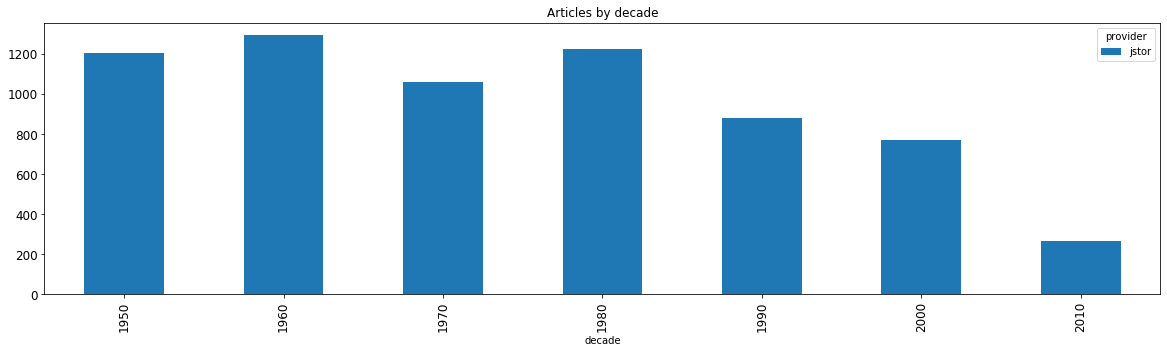

In [22]:
df.groupby(['decade', 'provider'])['id'].agg('count').unstack()\
    .plot.bar(title='Documents by decade', figsize=(20, 5), fontsize=12, stacked=True);

And do the same for the total number of pages.

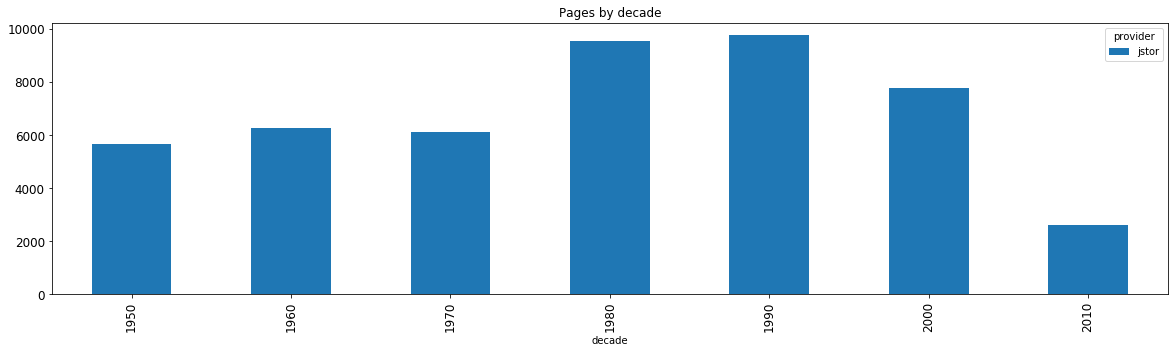

In [20]:
df.groupby(['decade', 'provider'])['pageCount'].agg('sum').unstack()\
    .plot.bar(title='Pages by decade', figsize=(20, 5), fontsize=12, stacked=True);